## Introduction to Polynomial Regression (with Python Implementation)

Uma regressão polinomial é um caso especial de regressão linear onde utilizamos uma equação polinominal a ser fitada. Utilizamos regressão polinominal quando existe uma relação curvilinea entre a variável independente e a variável dependente.

In [15]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# for calculating mean_squared error
from sklearn.metrics import mean_squared_error

In [18]:
## Demonstando um relacionamento não linear (alterei o código para criar uma feature polinominal de quarto grau)

x=10*np.random.normal(0,1,7000)
y=10*(-x**4)+np.random.normal(-100,100,7000)

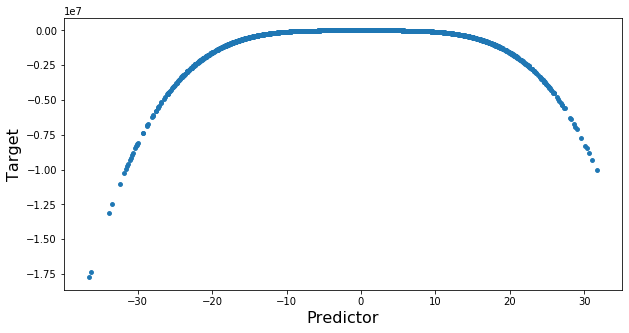

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

Os dados acima possuem uma relação, porem ela é não linear.

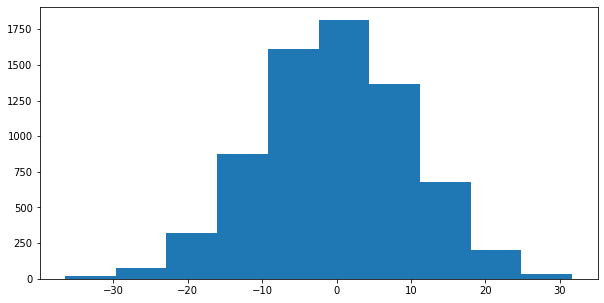

In [20]:
plt.figure(figsize=(10,5))
plt.hist(x)
plt.show()

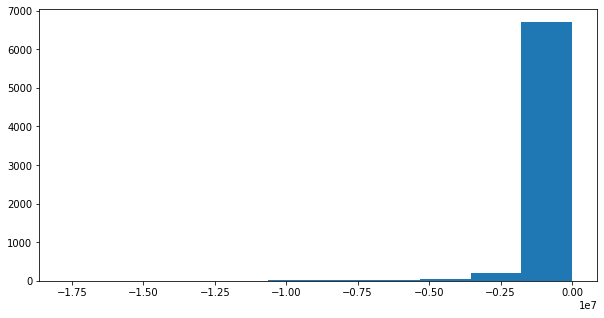

In [21]:
plt.figure(figsize=(10,5))
plt.hist(y)
plt.show()

In [22]:
# Importing Linear Regression
from sklearn.linear_model import LinearRegression

# Training Model
lm=LinearRegression()
lm.fit(x.reshape(-1,1),y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

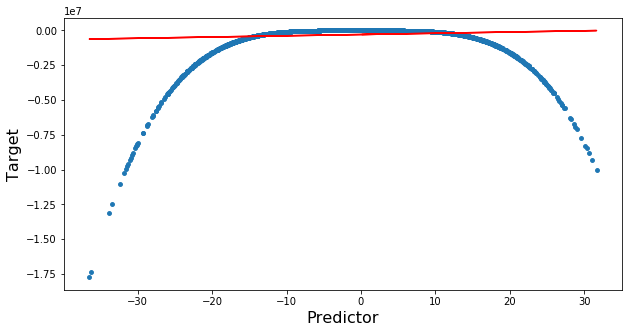

In [23]:
## criando predições para cada valor de X
y_pred=lm.predict(x.reshape(-1,1))

# plotting predictions
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

In [24]:
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,y_pred)))

RMSE for Linear Regression=> 902559.5514233042


#### O erro nesse caso está altíssimo pq a regressão linear não é a mais recomendada para essa situação, temos que usar a regressão polinomial.

Para fazer a regressão polinominal precisamos, primeiro, criar features polinomais e após isso fitar um modelo linear. Conforme o seguinte pipeline.

![pipe](pr7.png)

In [25]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.reshape(-1,1),y.reshape(-1,1))

Pipeline(memory=None,
         steps=[('polynomial',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('modal',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

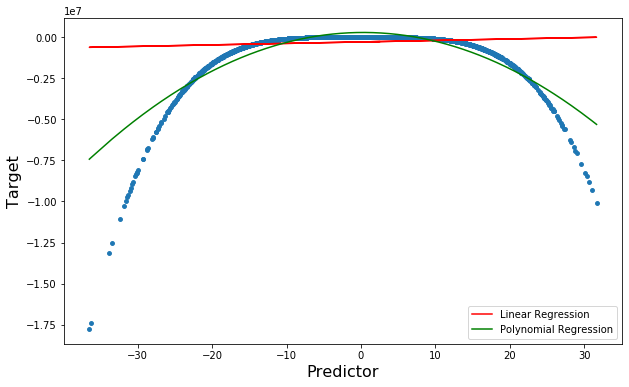

In [26]:
poly_pred=pipe.predict(x.reshape(-1,1))
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()

In [28]:
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,poly_pred)))

RMSE for Linear Regression=> 1205815.235709722


A regressão polinomial acima não foi feita da forma correta. Utilizamos o segundo grau, quando na verdade o melhor seria o quarto grau.

## Minha implementação

In [40]:
data = {}

for i in range(2,5):
    Input=[('polynomial',PolynomialFeatures(degree=i)),('modal',LinearRegression())]
    pipe=Pipeline(Input)
    pipe.fit(x.reshape(-1,1),y.reshape(-1,1))
    pred_values = pipe.predict(x.reshape(-1,1))
    data[i] = pred_values
    print(f'RMSE for Poly Regression degree {i} => ',np.sqrt(mean_squared_error(y,pred_values)))

RMSE for Poly Regression degree 2 =>  422382.61018967914
RMSE for Poly Regression degree 3 =>  403390.6001083098
RMSE for Poly Regression degree 4 =>  98.6799602230124


In [41]:
len(data)

3

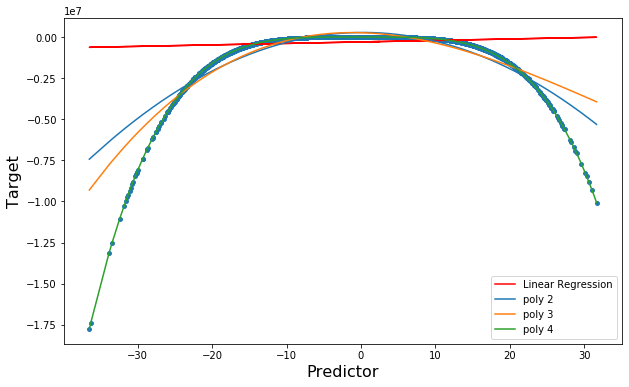

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r',label='Linear Regression')

for i in range(2,5):
    sorted_zip = sorted(zip(x,data[i]))
    x_poly, poly_pred = zip(*sorted_zip)
    plt.plot(x_poly,poly_pred,label=f'poly {i}')

plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()   

O polinomio de grau 4 é o melhor.